# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [2]:
import numpy as np

def f1(x):
    return (np.exp(x))*(np.log10(x))
xa=1
xb=3
N=10000000
u= np.random.uniform(a,b,N)  #Cualquier valor dentro del intervalo dado tiene posibilidad de salir ()
np.mean(f1(u))*(b-a)
#u[0], f(u[0])
#np.mean(u) #mean (media) promedio


6.089944186313396

In [4]:
import numpy as np

def f2(x):
    return np.sin(x)* np.log(x)
ya=1
yb=3
N=10000000
u= np.random.uniform(a,b,N)  #Cualquier valor dentro del intervalo dado tiene posibilidad de salir ()
np.mean(f2(u))*(b-a)
#u[0], f(u[0])
#np.mean(u) #mean (media) promedio

0.8696658888537824

In [7]:
a = 1
b = 3
N = np.logspace(1, 5, 5)
table = pd.DataFrame(columns=[], index=N)


def montecarlo(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)


for i in N:
    aprox1 = montecarlo(f1, int(i), a, b)
    aprox2 = montecarlo(f2, int(i), a, b)
    table.loc[i, "Aproximación f1(x)"] =  aprox1
    table.loc[i, "Error f1(x)"] = abs(6.09207 - aprox1)
    table.loc[i, "Aproximación f2(x)"] =  aprox2
    table.loc[i, "Error f2(x)"] = abs(0.869844 - aprox2)

table

,Aproximación f1(x),Error f1(x),Aproximación f2(x),Error f2(x)
10.0,7.945917,1.853847,0.859315,0.010529
100.0,5.788254,0.303816,0.907596,0.037752
1000.0,6.114673,0.022603,0.860046,0.009798
10000.0,6.134554,0.042484,0.866658,0.003186
100000.0,6.094157,0.002087,0.870967,0.001123


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

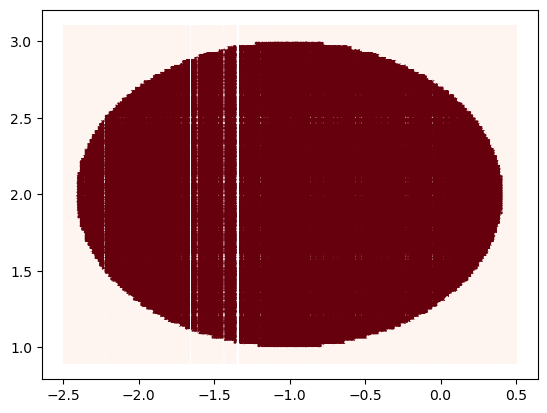

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def bernoulli (x, y):
    return x**2 + 2*y**2 <= - 2*x + 8*y - 7

x = np.random.uniform(-2.5, 0.5, 700)
y = np.random.uniform(0.9, 3.1, 700)

X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, s=1, c=bernoulli(X,Y), cmap="Reds")

In [13]:
def montecarlo(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x, y)
    AR = (xb - xa) * (yb - ya)
    return np.mean(B) * AR


N = np.logspace(1, 5, 5)

table = pd.DataFrame(columns=["Aproximación", "Error Relativo"], index=N)

for i in N:
    AR = (0.5 + 2.5) * (3.1 - 0.9)
    AD = montecarlo(bernoulli, -2.5, 0.5, 0.9, 3.1, int(i))
    C_rel = ((1 - (AD / AR))/(AD / AR))**(1/2)
    error = np.log10(C_rel) - ((1/2)*np.log10(i))
    
    table.loc[i, "Aproximación"] =  AD
    table.loc[i, "Error Relativo"] = error

table

,Aproximación,Error Relativo
10.0,5.28,-0.80103
100.0,4.356,-1.144033
1000.0,4.4154,-1.652799
10000.0,4.41342,-2.152505
100000.0,4.418106,-2.653201


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

### Ingeniería en Nanotecnología

En ingeniería en nanotecnología, se puede usar para modelar fenómenos físicos, químicos o biológicos a escala nanométrica, como el transporte de electrones, la difusión de moléculas o la interacción de nanopartículas

- Simulaciones de propiedades electromagnéticas: La integración de Monte Carlo se utiliza para simular y estudiar las propiedades electromagnéticas de nanoestructuras. Por ejemplo, se pueden realizar cálculos de absorción y dispersión de luz en nanopartículas metálicas para determinar sus aplicaciones en dispositivos optoelectrónicos.

- Caracterización de materiales a escala nanométrica: La integración de Monte Carlo es útil para la caracterización de propiedades físicas de materiales a escala nanométrica, como su conductividad térmica y eléctrica. Estas simulaciones proporcionan información sobre el comportamiento de los materiales en condiciones extremas y su viabilidad para su uso en aplicaciones nanotecnológicas

- Simulación de procesos químicos y reacciones en nanoescala: La integración de Monte Carlo se aplica en el estudio de reacciones químicas y procesos de adsorción y desorción de moléculas en superficies y nanoestructuras. Estas simulaciones permiten comprender los mecanismos de reacción y la cinética de procesos químicos a nivel nanométrico, lo que es útil para el diseño de catalizadores y sensores más eficientes.